<a href="https://colab.research.google.com/github/Preethikuppuri/Preethikuppuri/blob/main/Autonomous%20Driving%20%E2%80%93%20Vision%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python numpy


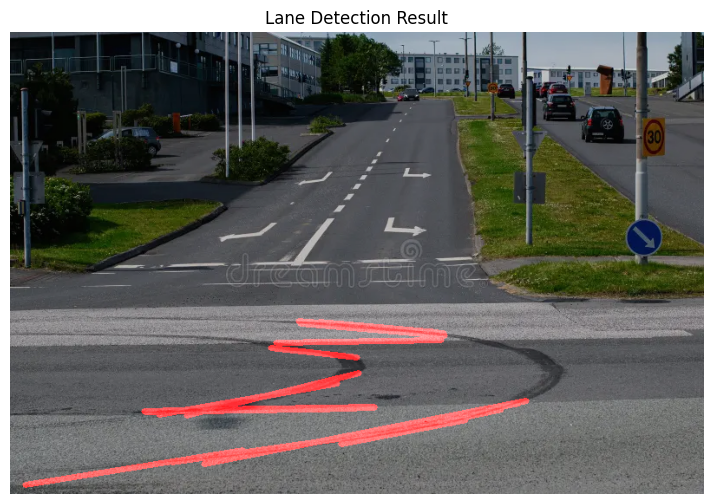

In [4]:
# Autonomous Driving – Lane Detection Project
# Requirements: OpenCV, NumPy
# !pip install opencv-python numpy  # Uncomment to install

import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load sample driving image
# You can upload your own image or video in Colab
image = cv2.imread('/content/urbanroad.webp')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    cv2.fillPoly(mask, vertices, 255)
    masked = cv2.bitwise_and(img, mask)
    return masked

def draw_lines(img, lines, color=[255,0,0], thickness=5):
    if lines is None:
        return
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1,y1), (x2,y2), color, thickness)

def lane_detection(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Apply Gaussian Blur
    blur = cv2.GaussianBlur(gray, (5,5), 0)

    # Canny Edge Detection
    edges = cv2.Canny(blur, 50, 150)

    # Define region of interest
    height = image.shape[0]
    width = image.shape[1]
    roi_vertices = [
        (0, height),
        (width/2 - 50, height/2 + 50),
        (width/2 + 50, height/2 + 50),
        (width, height)
    ]
    cropped_edges = region_of_interest(edges, np.array([roi_vertices], np.int32))

    # Hough Transform to detect lines
    lines = cv2.HoughLinesP(
        cropped_edges,
        rho=1,
        theta=np.pi/180,
        threshold=50,
        minLineLength=50,
        maxLineGap=150
    )

    # Draw lines on a blank image
    line_image = np.zeros_like(image)
    draw_lines(line_image, lines)

    # Combine with original image
    combo = cv2.addWeighted(image, 0.8, line_image, 1, 1)
    return combo

# Run lane detection
lanes_image = lane_detection(image)

# Display result
plt.figure(figsize=(10,6))
plt.imshow(lanes_image)
plt.title('Lane Detection Result')
plt.axis('off')
plt.show()
